In [3]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv("./wetherdata.csv")

df_copy = df.copy()

df_copy['time'] = pd.to_datetime(df_copy['time'], format='mixed').dt.date
df_copy = df_copy.drop(columns=["Unnamed: 0"])
df_copy

,time,temperature_2m,apparent_temperature
0,2025-08-01,14.5,14.0
1,2025-08-01,14.3,13.5
2,2025-08-01,14.1,13.2
3,2025-08-01,13.9,13.3
4,2025-08-01,14.3,13.9
...,...,...,...
1075,2025-09-14,27.2,26.3
1076,2025-09-14,26.1,25.3
1077,2025-09-14,25.0,24.2
1078,2025-09-14,24.1,23.5


In [5]:
daily_avg = df_copy.groupby("time").mean(numeric_only=True).reset_index()
daily_avg.head()

,time,temperature_2m,apparent_temperature
0,2025-08-01,18.770833,18.708333
1,2025-08-02,19.512500,20.516667
2,2025-08-03,20.508333,21.508333
3,2025-08-04,19.704167,19.625000
4,2025-08-05,21.100000,20.591667


In [7]:
print("Main Statistics")
df_copy.describe()

Main Statistics


,temperature_2m,apparent_temperature
count,1080.000000,1080.000000
mean,20.757315,20.142130
std,4.518355,4.844952
min,10.100000,6.800000
25%,17.500000,16.900000
50%,20.400000,20.400000
75%,23.700000,23.300000
max,33.900000,32.300000


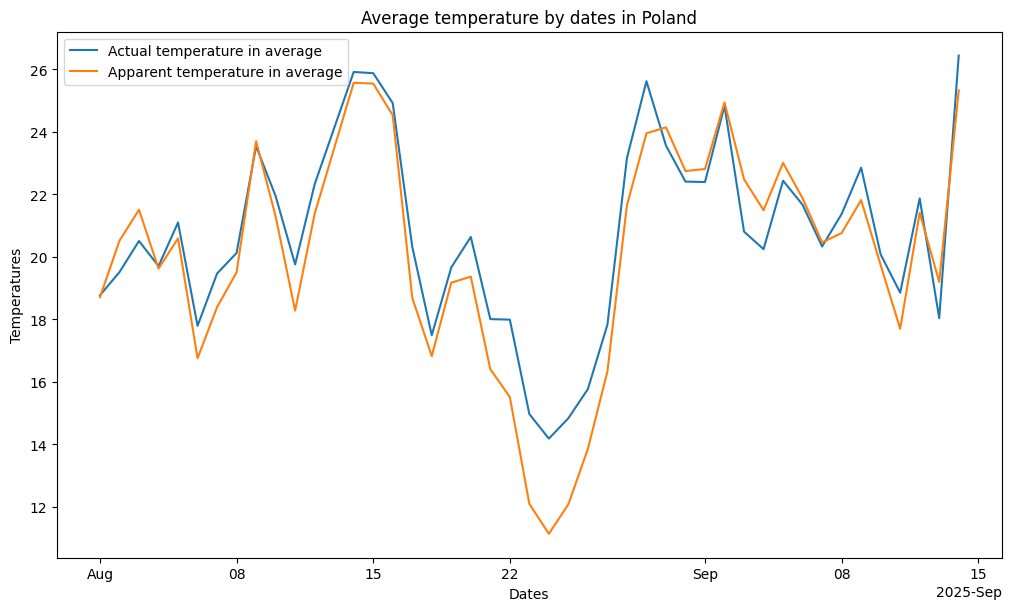

In [6]:
from matplotlib.dates import ConciseDateFormatter

fig, ax = plt.subplots(figsize=(10, 6), layout='constrained')
ax.plot(daily_avg['time'], daily_avg['temperature_2m'], label='Actual temperature in average')
ax.plot(daily_avg['time'], daily_avg['apparent_temperature'], label='Apparent temperature in average')
ax.xaxis.set_major_formatter(ConciseDateFormatter(ax.xaxis.get_major_locator()))
ax.set_xlabel('Dates')
ax.set_ylabel('Temperatures')
ax.set_title("Average temperature by dates in Poland")
ax.legend()